### MLP

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [3]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50],random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [4]:
rmse

0.5053326657968733

##### Building and training a standard MLP with Scikit-Learn in just a few lines of code is
##### very convenient, but the neural net features are limited
##### the MLPRegressor class does not support activation functions in the output layer
##### MLPRegressor only supports the MSE.

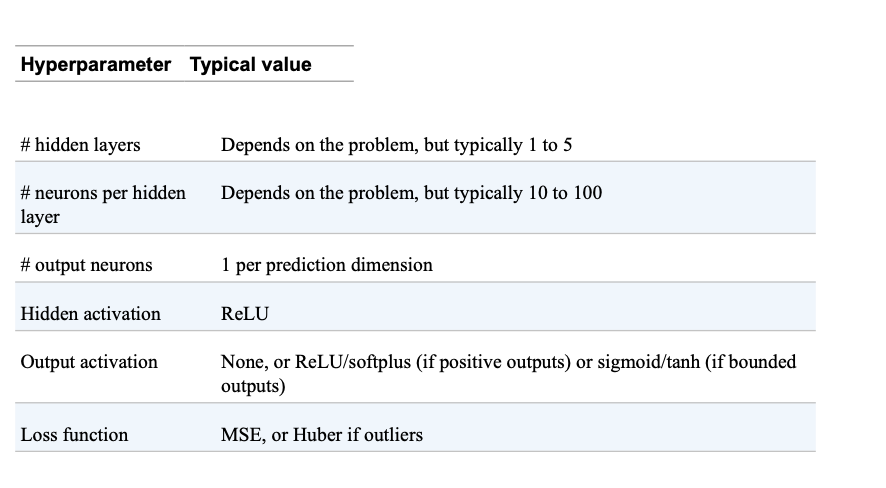

#### Desgin a multilayer pereceptron classifier on the Iris dataset. It’s a almost a linear task, so a single layer with 5 to 10 neurons should suffice (and make sure to scale the features).

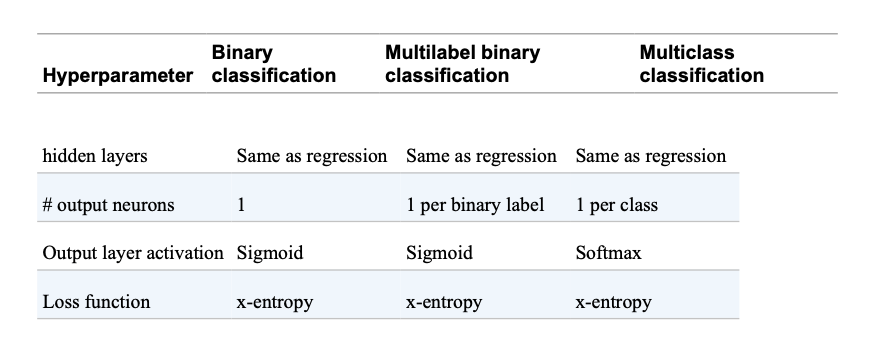

### Implementing Multilayer Perceptron with Keras

#### Building an Image Classifier Using the Sequential API

In [5]:
import tensorflow as tf

2025-03-27 17:01:07.663586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
               "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Ankle boot'

In [12]:
# Creating the model
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
weights, biases = hidden1.get_weights()

In [17]:
weights

array([[ 0.063196  , -0.01423775,  0.05390503, ..., -0.04938275,
        -0.0420791 , -0.04529987],
       [ 0.05482063, -0.00361345, -0.03507151, ..., -0.04361894,
         0.06313278, -0.02359849],
       [-0.00511239,  0.06809287, -0.03981178, ...,  0.06368658,
        -0.03476933, -0.05539243],
       ...,
       [ 0.04092263, -0.04430488,  0.03159977, ...,  0.06500673,
        -0.03367982,  0.00648273],
       [-0.03465429,  0.06750791,  0.06010163, ..., -0.01587979,
        -0.00936071,  0.03252511],
       [ 0.06246071,  0.00831836, -0.01926349, ..., -0.02981765,
         0.00030917,  0.00904707]], dtype=float32)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6899 - loss: 0.9929 - val_accuracy: 0.8248 - val_loss: 0.5054
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8252 - loss: 0.5060 - val_accuracy: 0.8382 - val_loss: 0.4552
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8420 - loss: 0.4519 - val_accuracy: 0.8442 - val_loss: 0.4323
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8532 - loss: 0.4214 - val_accuracy: 0.8498 - val_loss: 0.4165
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8608 - loss: 0.3995 - val_accuracy: 0.8534 - val_loss: 0.4040
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8664 - loss: 0.3824 - val_accuracy: 0.8562 - val_loss: 0.3978
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8710 - loss: 0.3682 - val_accuracy: 0.8582 - val_loss: 0.3928
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8753 - loss: 0.3560

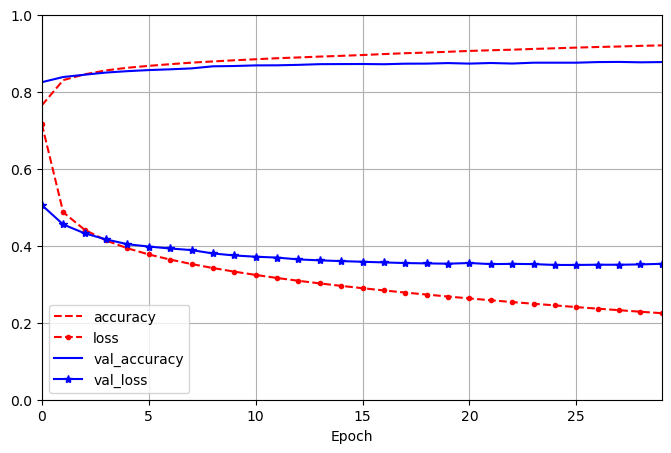

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [24]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9221 - loss: 0.2216 - val_accuracy: 0.8774 - val_loss: 0.3538
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9236 - loss: 0.2179 - val_accuracy: 0.8770 - val_loss: 0.3536
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9248 - loss: 0.2142 - val_accuracy: 0.8784 - val_loss: 0.3558
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9256 - loss: 0.2105 - val_accuracy: 0.8792 - val_loss: 0.3560
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9276 - loss: 0.2069 - val_accuracy: 0.8796 - val_loss: 0.3543
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9288 - loss: 0.2036 - val_accuracy: 0.8802 - val_loss: 0.3528
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9308 - loss: 0.1999 - val_accuracy: 0.8790 - val_loss: 0.3563
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9317 - loss: 0.1968

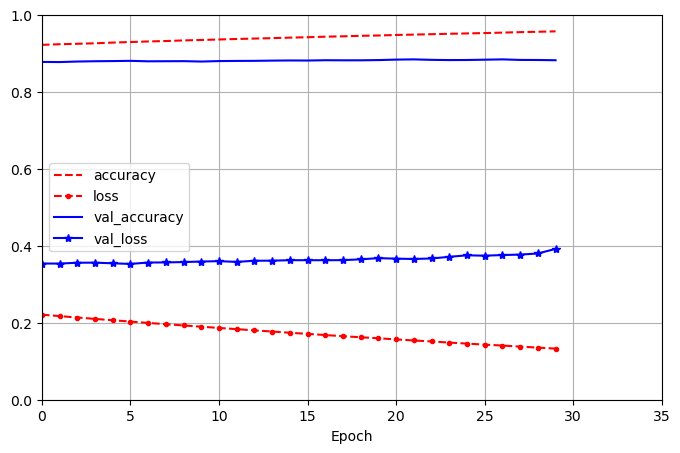

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 35], ylim=[0, 1], grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8773 - loss: 0.4059


[0.39535167813301086, 0.8794999718666077]

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API

In [31]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [32]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - RootMeanSquaredError: 18.5003 - loss: 501.5645 - val_RootMeanSquaredError: 1.6055 - val_loss: 2.5777
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 1.3280 - loss: 1.7668 - val_RootMeanSquaredError: 1.6392 - val_loss: 2.6871
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 1.2893 - loss: 1.6635 - val_RootMeanSquaredError: 2.2441 - val_loss: 5.0358
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.9867 - loss: 4.1089 - val_RootMeanSquaredError: 4.4529 - val_loss: 19.8280
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 5.7743 - loss: 36.3785 - val_RootMeanSquaredError: 1.4702 - val_loss: 2.1616
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 1.2236 - loss: 1.5241 - val_RootMeanSquaredError: 3.8166 - val_loss: 14.5662
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 1.8115 - loss: 3.

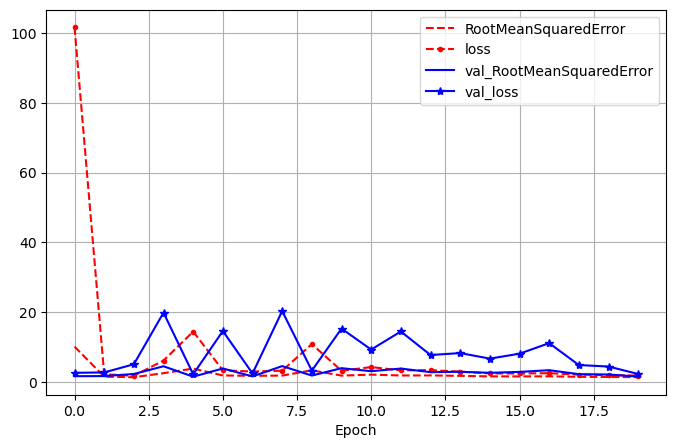

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5),grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [34]:
mse_test

0.7217926979064941

In [35]:
rmse_test

0.8495838642120361

#### Building Complex Models Using the Functional API

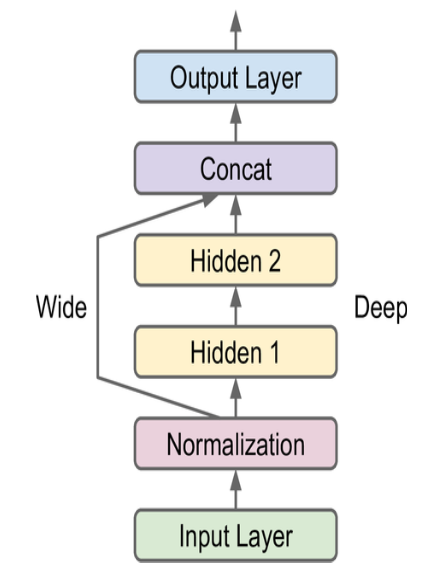

In [36]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([input_, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [37]:
#!pip install pydot graphviz


In [38]:
import graphviz 

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [42]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))


Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.9075 - loss: 0.8427 - val_RootMeanSquaredError: 6.1567 - val_loss: 37.9051
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7995 - loss: 0.6405 - val_RootMeanSquaredError: 1.8833 - val_loss: 3.5467
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8365 - loss: 0.7026 - val_RootMeanSquaredError: 8.9394 - val_loss: 79.9130
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8958 - loss: 0.8259 - val_RootMeanSquaredError: 2.9062 - val_loss: 8.4460
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.8797 - loss: 0.8069 - val_RootMeanSquaredError: 9.1043 - val_loss: 82.8889
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8868 - loss: 0.8206 - val_RootMeanSquaredError: 3.3792 - val_loss: 11.4188
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8568 -

In [43]:
mse_test, rmse_test = model.evaluate(X_test, y_test)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.7306 - loss: 0.5344


In [44]:
print(f"the mse error is: {mse_test}, and the rmse is: {rmse_test}")

the mse error is: 0.5317050218582153, and the rmse is: 0.7291810512542725


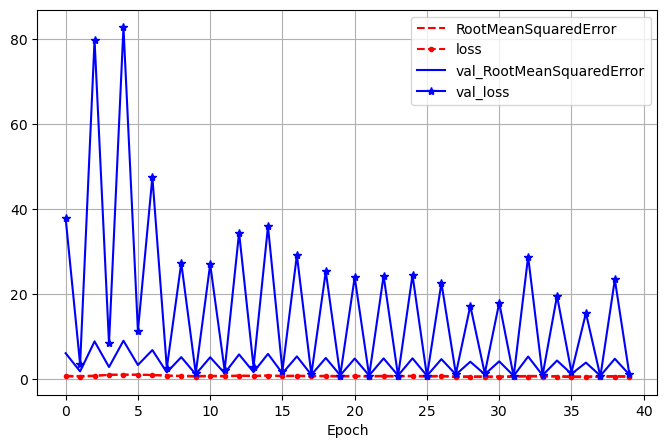

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5),grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

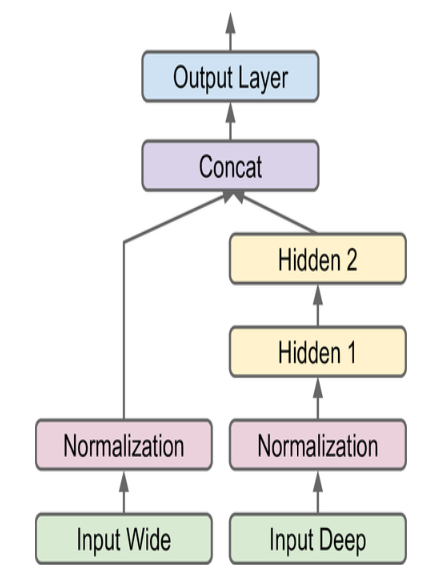

This architecture represents a Wide and Deep Learning model, a type of neural network used for recommendation systems and predictive analytics. It combines two types of input processing:

Wide Component (Left Branch)

The Input Wide consists of categorical features or manually engineered features (e.g., memorized interactions).

These inputs go through Normalization to ensure stability in training.

The processed data is then forwarded directly to the Concat layer.

Deep Component (Right Branch)

The Input Deep consists of raw or continuous features that require hierarchical learning.

These inputs are first Normalized.

They pass through multiple hidden layers (Hidden 1, Hidden 2) to extract complex patterns.

The output of the final hidden layer is forwarded to the Concat layer.

Fusion and Prediction

The outputs from both the Wide and Deep components are merged at the Concat layer.

This combined representation is fed into the Output Layer, which produces the final prediction.

Purpose of this Model
The Wide part helps memorize historical interactions and known relationships.

The Deep part generalizes to unseen patterns by learning feature interactions.

The combination balances memorization and generalization, making it ideal for recommendation systems and ranking tasks.



In [46]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=
[output])

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics= ["RootMeanSquaredError"])

In [48]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [49]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train,
epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_22', 'keras_tensor_23']. Received: the structure of inputs=('*', '*')
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - RootMeanSquaredError: 1.4022 - loss: 2.0677 - val_RootMeanSquaredError: 0.8451 - val_loss: 0.7142
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.7022 - loss: 0.4936 - val_RootMeanSquaredError: 0.6236 - val_loss: 0.3889
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6558 - loss: 0.4304 - val_RootMeanSquaredError: 0.6159 - val_loss: 0.3793
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6408 - loss: 0.4108 - val_RootMeanSquaredError: 0.6004 - val_loss: 0.3604
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6322 - loss: 0.3999 - val_RootMeanSquaredError: 0.7035 - val_loss: 0.4949
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6239 - loss: 0.3894 - val_RootMeanSquaredError: 0.6167 - val_loss: 0.3804
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6174 - loss: 0.3813 -

In [50]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5835 - loss: 0.3405


In [51]:
mse_test

[0.33419811725616455, 0.578098714351654]

In [52]:
y_pred = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [53]:
y_pred

array([[0.5976533],
       [1.171927 ],
       [3.6157038]], dtype=float32)

There are also many use cases in which you may want to have multiple
outputs:
The task may demand it. For instance, you may want to locate and
classify the main object in a picture. This is both a regression tasks
and a classification task.
Similarly, you may have multiple independent tasks based on the
same data. Sure, you could train one neural network per task, but in
many cases you will get better results on all tasks by training a
single neural network with one output per task. This is because the
neural network can learn features in the data that are useful across
tasks. For example, you could perform multitask classification on
pictures of faces, using one output to classify the person’s facial
expression (smiling, surprised, etc.) and another output to identify
whether they are wearing glasses or not.
Another use case is as a regularization technique (i.e., a training
constraint whose objective is to reduce overfitting and thus
improve the model’s ability to generalize). For example, you may
want to add an auxiliary output in a neural network architecture
to ensure that the underlying part of the network
learns something useful on its own, without relying on the rest of
the network.

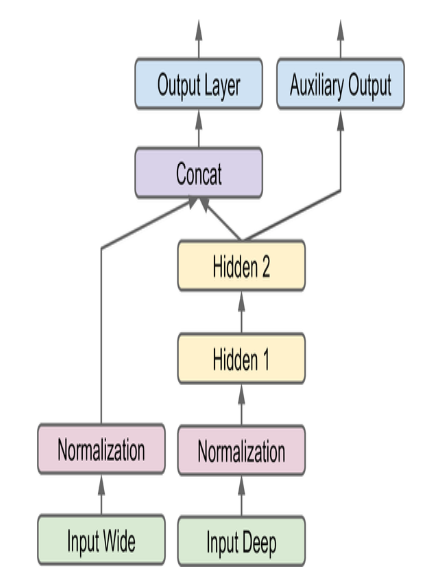

In [54]:
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],outputs=[output, aux_output])

In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1),
optimizer=optimizer, metrics=["RootMeanSquaredError","RootMeanSquaredError"])

In [58]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
(X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
validation_data=((X_valid_wide, X_valid_deep), (y_valid,
y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - dense_13_RootMeanSquaredError: 1.1256 - dense_13_loss: 1.2184 - dense_14_RootMeanSquaredError: 2.1648 - dense_14_loss: 0.4896 - loss: 1.7080 - val_dense_13_RootMeanSquaredError: 0.6503 - val_dense_13_loss: 0.3805 - val_dense_14_RootMeanSquaredError: 1.1462 - val_dense_14_loss: 0.1313 - val_loss: 0.5119
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - dense_13_RootMeanSquaredError: 0.6415 - dense_13_loss: 0.3706 - dense_14_RootMeanSquaredError: 0.8390 - dense_14_loss: 0.0705 - loss: 0.4411 - val_dense_13_RootMeanSquaredError: 0.5879 - val_dense_13_loss: 0.3110 - val_dense_14_RootMeanSquaredError: 0.8012 - val_dense_14_loss: 0.0642 - val_loss: 0.3752
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - dense_13_RootMeanSquaredError: 0.6084 - dense_13_loss: 0.3332 - dense_14_RootMeanSquaredError: 0.7160 - dense_14_loss: 0.0513 - loss: 0.3845 - val_dense_13_RootMeanSquaredError: 0.5760 - val_dense_13_loss: 0.2985 - val_dense_14_R

In [59]:
eval_results = model.evaluate((X_test_wide, X_test_deep),(y_test, y_test)
                             )

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - dense_13_RootMeanSquaredError: 0.5690 - dense_13_loss: 0.2915 - dense_14_RootMeanSquaredError: 0.6174 - dense_14_loss: 0.0381 - loss: 0.3296


In [60]:
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

In [62]:
weighted_sum_of_losses

0.3266380727291107

In [63]:
main_loss

0.28836581110954285

In [64]:
aux_loss

0.037803880870342255

In [65]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [66]:
y_pred_main

array([[0.5322151],
       [1.1498382],
       [3.6925168]], dtype=float32)

In [67]:
y_pred_aux

array([[0.75948507],
       [0.9744211 ],
       [3.5420563 ]], dtype=float32)

In [68]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [69]:
y_pred

{'dense_13': array([[0.5322151],
        [1.1498382],
        [3.6925168]], dtype=float32),
 'dense_14': array([[0.75948507],
        [0.9744211 ],
        [3.5420563 ]], dtype=float32)}

### Using the Subclassing API to Build Dynamic Models

In [72]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
        

In [73]:
model = WideAndDeepModel(30, activation="relu",name="my_cool_model")